## **Lời giới thiệu**

Trong bối cảnh ngành ngân hàng ngày càng cạnh tranh, việc duy trì khách hàng hiện tại trở thành một yếu tố sống còn. Khi khách hàng rời bỏ ngân hàng (bank churn), không chỉ doanh thu giảm mà chi phí thu hút khách hàng mới cũng tăng cao. Do đó, hiểu rõ nguyên nhân và dự đoán hành vi rời bỏ của khách hàng là bước quan trọng để ngân hàng phát triển các chiến lược giữ chân khách hàng hiệu quả hơn.

# **Mục đích của dự án**

Phân tích dữ liệu khách hàng để xác định các yếu tố chính dẫn đến việc rời bỏ ngân hàng.

Xây dựng mô hình dự đoán giúp nhận diện khách hàng có nguy cơ rời bỏ cao.

# **Khai báo thư viện**

## Bộ thư viện phân tích và thao tác dữ liệu

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Bộ thư viện cần thiết cho xây dựng model ML

In [39]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

TẢI DỮ LIỆU

In [40]:
raw_df = pd.read_excel(r'D:\Python\Bank churn\raw_data.xls')

In [41]:
raw_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender_mahoa,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [42]:
raw_df.shape

(10000, 14)

Tệp có 10000 dòng và 14 cột

In [43]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender_mahoa     10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 1.1+ MB


# **Data Cleaning**

# Kiểm tra dữ liệu trống

In [44]:
raw_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender_mahoa       0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [45]:
raw_df.dropna(inplace= True)

In [46]:
raw_df.shape

(10000, 14)

# Kiểm tra dữ liệu bị trùng lặp

In [47]:
raw_df.duplicated().sum()

0

# Loại bỏ cột không cần thiết

In [48]:
adjusted_df = raw_df.drop(columns=['RowNumber','CustomerId','Surname'])

In [49]:
adjusted_df.head()

,CreditScore,Geography,Gender_mahoa,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [50]:
adjusted_df.shape

(10000, 11)

In [51]:
adjusted_df.describe()

,CreditScore,Gender_mahoa,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Phân phối của EstimatedSalary

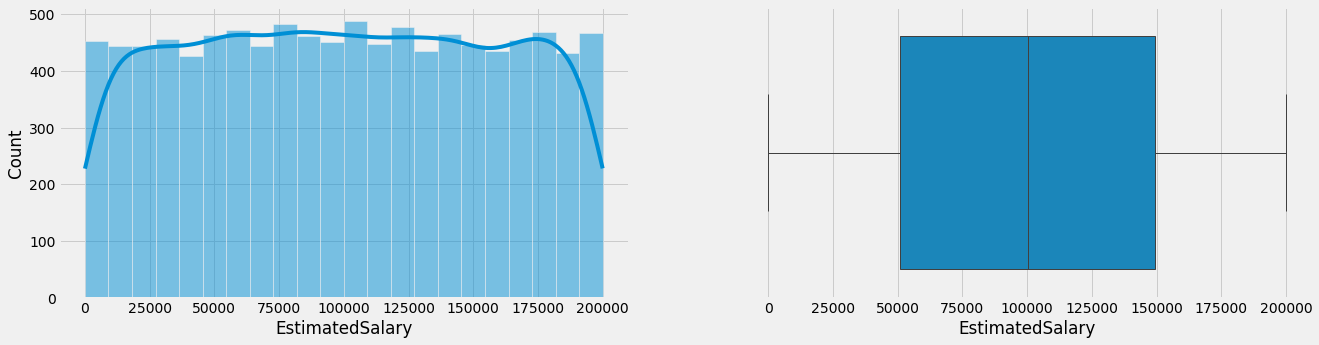

In [52]:
fix, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.histplot(data=adjusted_df, x='EstimatedSalary', kde=True, ax=ax[0])
sns.boxplot(data=adjusted_df, x='EstimatedSalary', ax=ax[1])

plt.show()

Dữ liệu rất đồng đều

# Phân phối của EstimatedSalary theo từng quốc gia

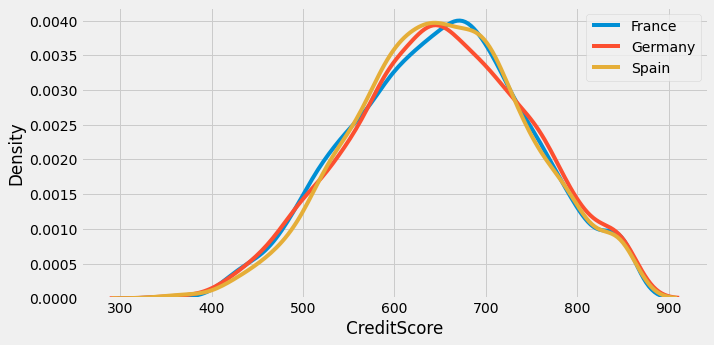

In [53]:
%matplotlib inline
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,5))


# Lấy danh sách những ngành có tổng hợp hơn 70 đo lường bên trong bộ cleaned_df
quocgia = adjusted_df.groupby(['Geography']).size()
quocgia = quocgia[quocgia>70].index

# Vẽ ra cho từng nhóm ngành
for x in quocgia:
    subset = adjusted_df[adjusted_df['Geography']==x]
    sns.kdeplot(subset['CreditScore'],
                label = x,
                ax = ax)
plt.legend()

Tiền lương không khác biệt quá nhiều ở 3 quốc gia

# Kiểm tra có hiện tượng tự tương quan hay không

<AxesSubplot:>

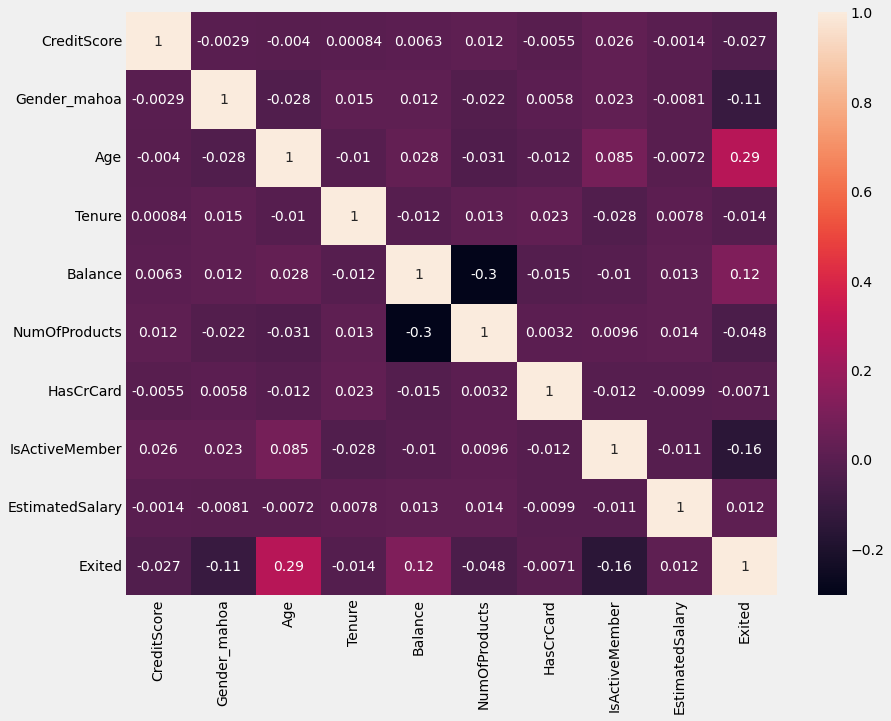

In [54]:
fig, ax = plt.subplots(1,1, figsize=(13,10))
sns.heatmap(adjusted_df.corr(), annot=True, ax=ax)

In [55]:
adjusted_df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [56]:
adjusted_df.columns

Index(['CreditScore', 'Geography', 'Gender_mahoa', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Mã hoá dữ liệu quốc gia

In [57]:
# Mã hóa cột dữ liệu "Quốc gia"
encoder = LabelEncoder()
adjusted_df['Geography'] = encoder.fit_transform(adjusted_df['Geography'])

In [58]:
adjusted_df['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

# Lựa chọ biến độc lập và biến phụ thuộc cho mô hình hồi quy logistic

In [59]:
X = adjusted_df.drop(columns=['Exited'])

y_linear = adjusted_df['Exited']


# Tạo mô hình hồi quy logistic và các chỉ số đánh giá mô hình

In [60]:
# Tạo mô hình hồi quy Logistic
model = LogisticRegression(class_weight='balanced')

# Lấy danh sách các cột cần được chuẩn hóa
columns = ['CreditScore', 'Gender_mahoa', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Tách ra tập train và test theo tỷ lệ 80:20 để huấn luyện và đánh giá mô hình
X_train, X_test, y_train, y_test = train_test_split(X, y_linear, train_size=.8, random_state=29)

# Chuẩn hóa dữ liệu

scaler = StandardScaler()
# Chuẩn hóa tập dữ liệu huấn luyện và kiểm tra
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện mô hình
model.fit(X_train_scaled, y_train)

# Dự đoán kết quả dựa trên X_test
y_pred = model.predict(X_test_scaled)

S
# Tính toán các chỉ số đánh giá mô hình
accu_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

metrics = pd.DataFrame({
                        'accuracy':[accu_score],
                        'precision':[prec_score],
                        'recall':[rec_score],
                        'f1':[f1score]})

In [61]:
metrics

,accuracy,precision,recall,f1
0,0.715,0.394483,0.685851,0.500876


Từ các hệ số trên, chúng tôi rút ra một vài nhận xét sau. Về hệ số Accuracy, trong số 100 mẫu thì có 71 mẫu được phân loại chính xác. Mô hình dự đoán đúng 39.4 mẫu trong 100 mẫu mô hình dự đoán là rời bỏ và đoán đúng 0.68 mẫu trong 100 mẫu mô hình thực sự là rời bỏ. Hệ số 'f1-score' là trung bình điều hòa giữa độ chuẩn xác và độ phủ. Hệ số này ở mức độ trung bình nên mô hình phân loại ở mức chấp nhận được.

Dựa vào các chỉ số trên, phương pháp hồi quy Logistic có thể chưa giải thích tốt cho vấn đề được đặt ra liên quan đến việc dự đoán rủi ro bị hủy niêm yết trên sàn giao dịch chứng khoán với tình hình tài chính hiện tại của doanh nghiệp. Vì vậy, có thể cần các nghiên cứu khác để trả lời tốt hơn cho vấn đề này.

In [62]:
# Hệ số độ góc và hệ số chặn mô hình
model.coef_, model.intercept_

(array([[-0.06342051,  0.0822003 , -0.26959925,  0.83580634, -0.02738353,
          0.29387773, -0.01049641, -0.00206711, -0.44834504,  0.05023469]]),
 array([-0.26615729]))

Text(13.060000000000002, 0.5, 'Predicted')

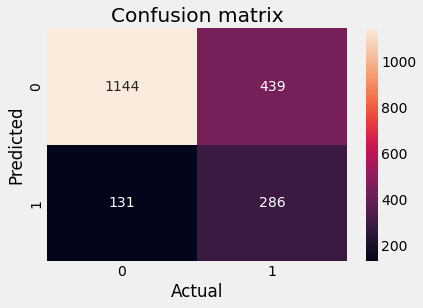

In [63]:
# Ma trận nhầm lẫn
df2_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))

# Trực quan hóa ma trận nhầm lẫn
sns.heatmap(data = df2_confusion_matrix, annot = True, fmt = 'g')
plt.title('Confusion matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Dựa vào ma trận nhầm lẫn, mô hình dự đoán có 1144 không rời bỏ và thực tế đúng như vậy. Ngoài ra, có 286 khách hàng rời bỏ và kết quả này giống với thực tế.

Tuy nhiên, mô hình dự đoán có 439 khách hàng không rời bỏ nhưng thực tế là có. Có 131 khách hàng được dự đoán rời bỏ nhưng thực tế là không

In [133]:
# Các hệ số dùng để đánh giá mô hình
y_pred = pd.Series(y_pred)
accuracy_score = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

scores = [accuracy_score, precision_score, recall_score, f1_score]
metrics = ['Accuracy', 'Precision', 'Recall', 'F-1']

model2_performance = pd.DataFrame({'Metrics': metrics, 'Scores': scores})
model2_performance

,Metrics,Scores
0,Accuracy,0.715000
1,Precision,0.394483
2,Recall,0.685851
3,F-1,0.500876
